# Введение в ML

[квиз](https://docs.google.com/forms/d/e/1FAIpQLScUY2sMnfRZATZ0xUfh5DyoWpz0tbKxS--G0WUB9OkemmxxQA/viewform?usp=sf_link)

## Исходные данные

Будем использовать датасет по стоимости страховых услуг - подробнее см. [соревнование на Kaggle](https://www.kaggle.com/mirichoi0218/insurance)

In [13]:
import logging
import os
import sys
import shutil

import numpy as np
from google.colab import drive

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)  # гарантируем воспроизводимость

run_env = os.getenv('RUN_ENV', 'COLLAB')
if run_env == 'COLLAB':
  from google.colab import drive
  ROOT_DIR = '/content/drive'
  drive.mount(ROOT_DIR)
  print('Google drive connected')
  root_data_dir = os.path.join(ROOT_DIR, 'MyDrive', 'ml_course_data')
  sys.path.append(os.path.join(ROOT_DIR, 'MyDrive', 'src'))
else:
  root_data_dir = os.getenv('DATA_DIR', '/srv/data')

print(os.listdir(root_data_dir))

if not os.path.exists(root_data_dir):
  raise RuntimeError('Отсутствует директория с данными')
else:
  print('Содержимое директории %s: %s' % (root_data_dir, os.listdir(root_data_dir)))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Google drive connected
['nyt-ingredients-snapshot-2015.csv', 'insurance (1).csv', 'non_linear.csv', 'client_segmentation.csv', 'eigen.pkl', 'clustering.pkl', 'boosting_toy_dataset.csv', 'politic_meme.jpg', 'gray_goose.jpg', 'test_dataset.pkl', 'memes', 'optimal_push_time', 'sklearn_data', 'my_little_recsys', 'corpora', 'logs', 'nltk_data', 'recsys_data', 'MNIST', 'hymenoptera_data', 'pet_projects', 'ocr_dataset_sample.csv', 'geo_points.csv.gzip', 'scored_corpus.csv', 'labeled_data_corpus.csv', 'memes_stat_dataset.zip', 'als_model.pkl', 'raw_data.zip', 'json_views.tar.gz', 'test_data.csv', 'sales_timeseries_dataset.csv.gz', 'brand_tweets_valid.csv', 'brand_tweets.csv', 'Health_and_Personal_Care.jsonl.gz', 'models', 'final_dataset.zip', 'ocr_dataset.zip', 'bidmachine_logs.zip', 'meta_Health_and_Personal_Care.jsonl.gz', 'messages.db', 'user_item_views.zip', 'con

Среди файлов находится `insurance.csv` - это и есть данные по стоимости страховки, на примере которых мы познакомимся с основными понятиями ML

Прочитаем файл с помощью бибилиотеки pandas

In [3]:
import os
import pandas as pd

insurance_df = pd.read_csv(os.path.join(root_data_dir, 'insurance.csv'))

insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
insurance_transformed_df = insurance_df

Наш таргет (целевая переменная) находится в столбце `charges`

Визуализируем переменную с помощью `.scatter`

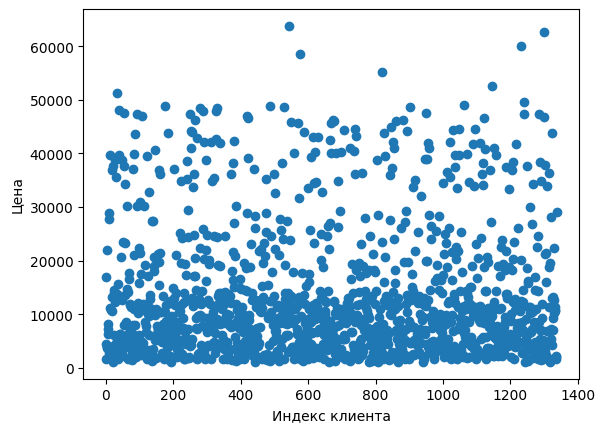

In [6]:
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

y = insurance_df['charges']

fig, subplot = plt.subplots()
plt.scatter(
    np.arange(len(y)),
    y
)
subplot.set_xlabel('Индекс клиента')
subplot.set_ylabel('Цена')
fig.show()

Кодируем фичи простым способом с помощью `LabelEncoder`, как в лекции

In [14]:
from sklearn.preprocessing import LabelEncoder

for label in ['sex', 'smoker', 'region']:
  insurance_transformed_df[label] = (
      LabelEncoder()
      .fit_transform(insurance_df[label])
  )

insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [15]:
insurance_df.region.value_counts(normalize=True)

,proportion
region,
2,0.272048
3,0.242900
1,0.242900
0,0.242152


#### Самостоятельное задание

В лекции посмотрели математические формулы


Код для аналитического вычисления коэффициентов линейной регрессии по формуле $\overline{w} = \left(X^TX\right)^{-1}X^T\overline{y}$


Реализуйте формулу матричного умножения для вычисления коэффициентов линейной регрессии на языке python

In [23]:
from numpy.linalg import inv, norm
import numpy as np
from sklearn.linear_model import LinearRegression
from scipy.spatial import distance

# вычисляем к-ты линейной регрессии
features = insurance_df.drop(labels='charges', axis=1).values
w_analytic = np.zeros(features.shape[1])
#-------- ВАШ КОД ТУТ -------------------






#----------------------------------------

print(f'Аналитически определённые коэффициенты {w_analytic}')

Аналитически определённые коэффициенты [0. 0. 0. 0. 0. 0. 0.]


Обучим линейную регрессию - это класс [sklearn.linear_model.LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

Загляните в документацию метода [.fit()](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit) который принимает на вход два аргумента

* $X$ - матрица объекты - признаки. Удалите из датафрейма `insurance_df` столбец `charges` и сохраните результат в переменную $X$
* `y` - значение целевой переменной

In [18]:
from sklearn.linear_model import LinearRegression

reg = None  # объект модели линейной регрессии
X = insurance_df.drop(labels='charges', axis=1)

reg = LinearRegression()
print('Начинаем обучение...')
reg.fit(X, y)
print('Модель обучена!')

Начинаем обучение...
Модель обучена!


Сравните ваши аналитические коэффициенты с коэффициентами из реализации sklearn

In [ ]:
from numpy.linalg import inv, norm
from sklearn.linear_model import LinearRegression


print(f"Коэффициенты, вычисленные моделью sklearn {reg.coef_}")
print(f"Евклидово расстояние между наборами коэффициентов {norm(reg.coef_ - w_analytic)}\n")

Добавим к датафрейму столбец `prediction`

In [19]:
insurance_df['prediction'] = reg.predict(X)

In [20]:
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges,prediction
0,19,0,27.900,0,1,3,16884.92400,25111.241864
1,18,1,33.770,1,0,2,1725.55230,3687.605173
2,28,1,33.000,3,0,2,4449.46200,6963.145707
3,33,1,22.705,0,0,1,21984.47061,3741.308405
4,32,1,28.880,0,0,1,3866.85520,5537.640897



#### Самостоятельное задание

Визуализируйте в виде "столбиков" коэффициенты "из коробки" и полученные аналитически на одном графике. Для наглядности используйте различную "прозрачность" столбиков

In [ ]:
#-------- ВАШ КОД ТУТ -------------------





#----------------------------------------

Поздравляю! вы реализовали обучение модели линейной регрессии на языке Python, причём полученные коэффициенты в целом совпадают с результатами, полученными с помощью класса `sklearn.linear_model.LinearRegression`, который является обёрткой над [метотодом для численного решения](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.lstsq.html).

#### Задача

посчитайте эмпирический риск по формуле

$$
Q_{\text{emp}}(h) = \frac{1}{N}\sum_{i=1}^{N}L(h(x_i, \theta), y_i)
$$

где $h(\cdot)$ - значение столбца prediction

Для удобства создайте столбец `squared_loss` - там должно храниться значение $L(y,\hat{y})$:

$L(y,\hat{y}) = (y - \hat{y})^2$

Пользоваться можно только функциями pandas

Полученное значение $Q$ округлите с помощью `np.round(Q, decimals=1)`

In [ ]:
num_rows = insurance_df.shape[0]
insurance_df['squared_loss'] = np.zeros(num_rows)
#-------- ВАШ КОД ТУТ -------------------






#----------------------------------------

Визуализируем гистограмму остатков линейной регрессии - это разница между истинным и предсказанным значением.

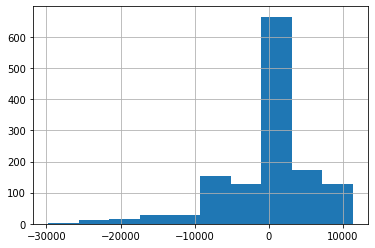

In [ ]:
(insurance_df['prediction'] - y).hist()

Кстати, метрику качества необязательно считать вручную - в sklearn реализовано [огромное количество метрик](https://scikit-learn.org/stable/modules/classes.html#regression-metrics) для регрессии (и других задач тоже)

Подробнее о метриках регрессии мы поговорим в дальнейших занятиях

В качестве упражнения посчитайте какую-нибудь метрику - например, MAE - [sklearn.metrics.mean_absolute_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html)

In [26]:
#-------- ВАШ КОД ТУТ -------------------
from sklearn.metrics import mean_absolute_error






#----------------------------------------
# help(mean_absolute_error)

Мы поговорили про фичи, про метрики - можно немного углубиться в модель, что представляет собой линейная регрессия?

Задача *линейной* регресии: восстановить на функцию $h(x_i)$ в виде *линейной комбинации* (т.е. суммы с некоторыми весами *важности*) признаков объекта. Сами признаки называются *предикторами*:,
$$
\forall x_i: h(x) = w_0 + w_1x_i^1 + \ldots + w_nx_i^n = \sum_{j=1}^{n}w_jx_i^j = \overline{x}_i^T\overline{w}
$$

К признаковому пространству добавляется "фиктивный" признак $x_0=1$, "важность" которого сохраняется в коэффициент $w_0$.

То есть "семейство функций" представляет собой всевозможные комбинации $[w_0, w_1 , w_2 , w_3 , w_4 , w_5 , w_6]$ а метод *.fit()* волшебным образом подбирает их так, чтобы получить максимальное качество.

Мера качества $L$ для задачи регрессии - квадрат разности между фактическим значением и прогнозом. ,
$$
L(h(x_i, \theta), y_i) = \left(y_i - h(x_i, \theta)\right)^2 = \left(y_i -  \sum_{j=1}^{n}w_jx_i^j\right)^2
$$

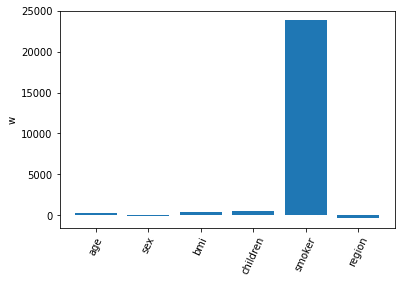

In [ ]:
fig, subplot = plt.subplots()
plt.bar(np.arange(len(reg.coef_)), reg.coef_)
subplot.set_xticks(np.arange(len(reg.coef_)))
subplot.set_xticklabels(X.columns.tolist(), rotation=65)
subplot.set_ylabel('w')
fig.show()

В качестве финального задания разберёмся как делать валидацию

Нам понадобится функция [sklearn.model_selection.train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

Функция принимает несколько аргументов

* `X, y` - первые два аргумента, которые нужно засплиттить
* `test_size=0.33` - доля датасета, которая уйдет в тест
* `random_state=RANDOM_SEED`

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split([1, 2, 3, 4], [5, 6, 7, 8], test_size=0.33, random_state=42)
# -------- ВАШ КОД ТУТ -------------------






# ----------------------------------------

Обучите модель на X_train, y_train вызвав метод fit

In [ ]:
validated_reg = None
#-------- ВАШ КОД ТУТ -------------------






#----------------------------------------

Сделайте предикт на `X_test`, `y_test` - сохраните его в переменную `y_test_predicted`

In [ ]:
y_test_predicted = np.zeros_like(y_test)
#-------- ВАШ КОД ТУТ -------------------






#----------------------------------------

Посчитайте [sklearn.metrics.mean_squared_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error)

* `y_true`
* `y_pred`

Ответ округлите `np.round(mse, decimals=1)`

In [ ]:
#-------- ВАШ КОД ТУТ -------------------






#----------------------------------------

### Задание

LabelEncoder - довольно тривиальное решение для кодирования фичей

Примените [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)

In [27]:
#-------- ВАШ КОД ТУТ -------------------






#----------------------------------------

In [ ]:
Ъ